In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio

In [53]:
home_values_dataset = pd.read_csv('homevalue.csv')
income = pd.read_csv('median_income.csv')
home_values_dataset.columns.values[5:] = pd.to_datetime(home_values_dataset.columns[5:])
home_values_dataset.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31 00:00:00,2000-02-29 00:00:00,2000-03-31 00:00:00,2000-04-30 00:00:00,2000-05-31 00:00:00,...,2024-04-30 00:00:00,2024-05-31 00:00:00,2024-06-30 00:00:00,2024-07-31 00:00:00,2024-08-31 00:00:00,2024-09-30 00:00:00,2024-10-31 00:00:00,2024-11-30 00:00:00,2024-12-31 00:00:00,2025-01-31 00:00:00
0,102001,0,United States,country,NaN,119729.572640,119940.215341,120201.443305,120761.726012,121406.544234,...,350165.829700,351570.606154,352120.860853,352265.907749,352504.359843,352945.853239,353522.496915,354005.575460,354711.020713,355327.955070
1,394913,1,"New York, NY",msa,NY,214911.652349,215824.905614,216746.617250,218614.361683,220548.475724,...,647851.001125,652477.077381,655536.133683,658263.386724,661979.750511,665977.942675,669477.234967,672228.240789,673999.838327,675063.976036
2,753899,2,"Los Angeles, CA",msa,CA,218489.647448,219302.706154,220385.692595,222540.471813,224897.124751,...,911031.498845,916863.716873,920777.178084,925109.643477,930243.585193,936603.517696,941773.674116,946228.303841,950210.062120,950740.494586
3,394463,3,"Chicago, IL",msa,IL,150432.480390,150571.737044,150836.953795,151496.747161,152290.399220,...,311972.006665,314053.134292,315253.946820,315976.493240,316881.631507,317866.656523,318826.563429,319846.118364,321070.725716,322389.516129
4,394514,4,"Dallas, TX",msa,TX,125268.936932,125324.732154,125388.874474,125555.445340,125775.064467,...,372240.198836,372383.086130,371723.001722,370790.474579,370143.446717,369946.958796,369841.800601,369555.460608,369035.088390,368515.900537


In [54]:
#Cleaning Data

print("\nBefore dropping missing values:")
print("New shape for home_values:", home_values_dataset.shape)

threshold = 0.4
home_values = home_values_dataset.loc[home_values_dataset.isnull().mean(axis=1) < threshold]

#home_values_reduced.dropna(inplace=True)

print("\nAfter dropping missing values:")
print("New shape for home_values:", home_values.shape)


Before dropping missing values:
New shape for home_values: (895, 306)

After dropping missing values:
New shape for home_values: (771, 306)


In [55]:
# Interpolate across columns (i.e., across time for each region)
home_values.iloc[:, 5:] = home_values.iloc[:, 5:].interpolate(axis=1)

# Optionally fill any remaining edge NaNs with forward/backward fill
home_values.iloc[:, 5:] = home_values.iloc[:, 5:].bfill(axis=1).ffill(axis=1)

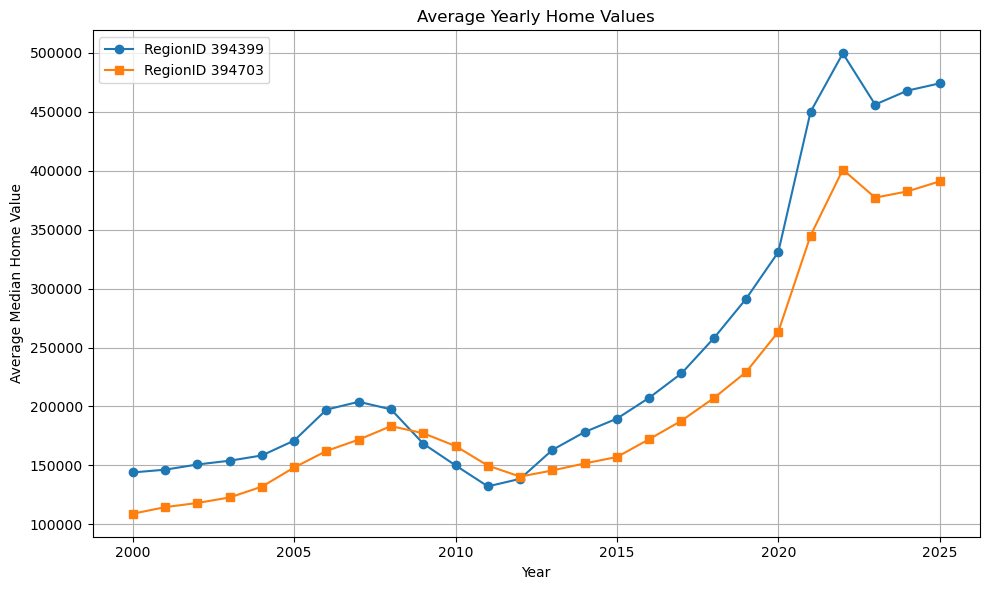

In [57]:
# Step 1: Extract the time series part
ts_1 = home_values[home_values['RegionID'] == 394399].iloc[:, 5:].squeeze()
ts_2 = home_values[home_values['RegionID'] == 394703].iloc[:, 5:].squeeze()

ts_1.index = pd.to_datetime(ts_1.index)
ts_2.index = pd.to_datetime(ts_2.index)

# Step 2: Group by year and calculate the average
ts_1_yearly = ts_1.groupby(ts_1.index.year).mean()
ts_2_yearly = ts_2.groupby(ts_2.index.year).mean()

# Step 3: Plot

plt.figure(figsize=(10, 6))
plt.plot(ts_1_yearly.index, ts_1_yearly.values, marker='o', linestyle='-', label='RegionID 394399')
plt.plot(ts_2_yearly.index, ts_2_yearly.values, marker='s', linestyle='-', label='RegionID 394703')

plt.title('Average Yearly Home Values')
plt.xlabel('Year')
plt.ylabel('Average Median Home Value')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

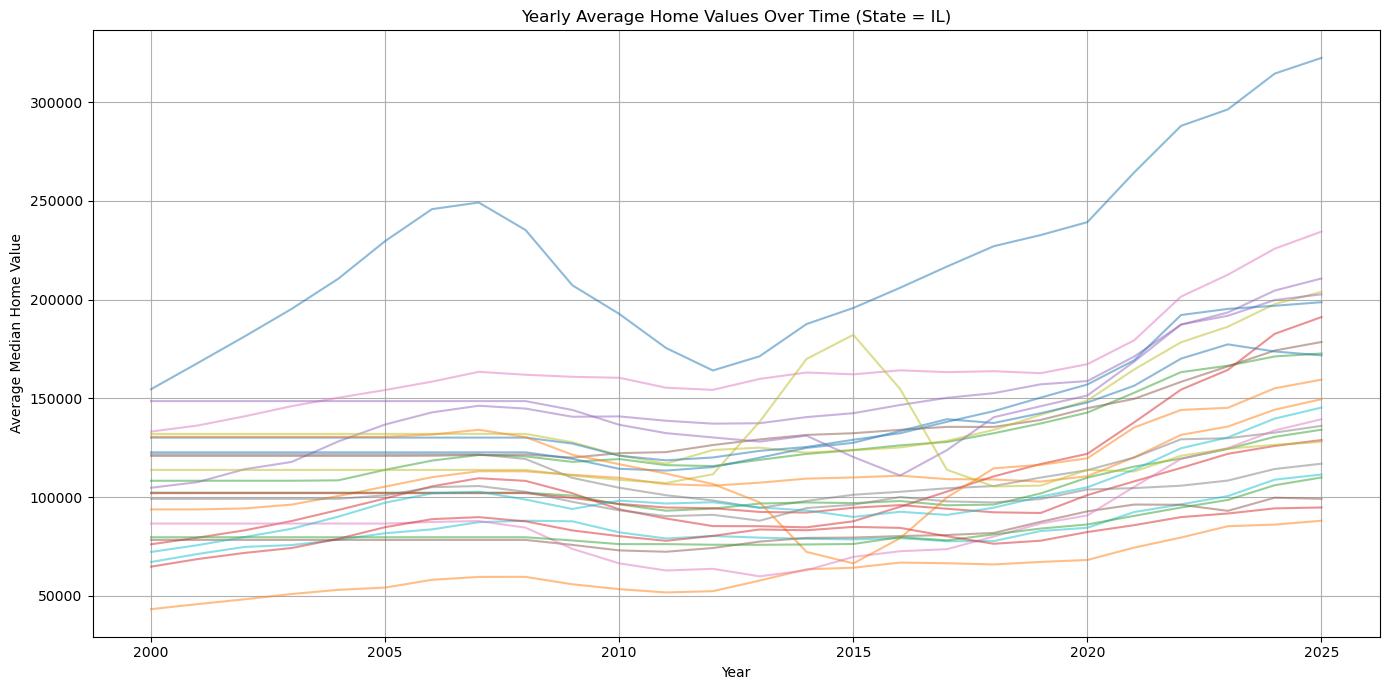

In [58]:
# Step 1: Filter only Illinois rows
illinois_data = home_values[home_values['StateName'] == 'IL']

# Step 2: Extract and transpose the time series portion
ts_data = illinois_data.iloc[:, 5:].T
ts_data.index = pd.to_datetime(ts_data.index)  # ensure datetime index
ts_data.columns = illinois_data['RegionID'].values  # set columns as RegionIDs

# Step 3: Group by year and calculate yearly average for each region
ts_yearly = ts_data.groupby(ts_data.index.year).mean()

# Step 4: Plot
plt.figure(figsize=(14, 7))
for region_id in ts_yearly.columns:
    plt.plot(ts_yearly.index, ts_yearly[region_id], alpha=0.5)

plt.title('Yearly Average Home Values Over Time (State = IL)')
plt.xlabel('Year')
plt.ylabel('Average Median Home Value')
plt.grid(True)
plt.tight_layout()
plt.show()

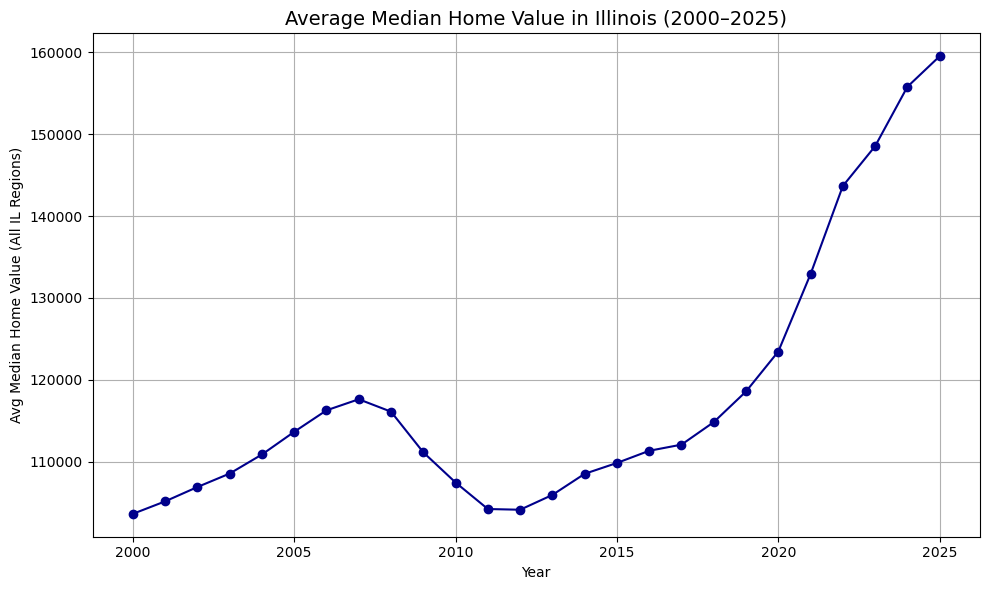

In [59]:
illinois_data = home_values[home_values['StateName'] == 'IL']

# Step 2: Extract and transpose time series
ts_data = illinois_data.iloc[:, 5:].T
ts_data.index = pd.to_datetime(ts_data.index)
ts_data.columns = illinois_data['RegionID'].values

# Step 3: Group by year and average across regions
ts_yearly = ts_data.groupby(ts_data.index.year).mean()

# Step 4: Calculate the average home value across all IL regions (per year)
il_yearly_avg = ts_yearly.mean(axis=1)

# Step 5: Plot it
plt.figure(figsize=(10, 6))
plt.plot(il_yearly_avg.index, il_yearly_avg.values, marker='o', linestyle='-', color='darkblue')
plt.title('Average Median Home Value in Illinois (2000–2025)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Avg Median Home Value (All IL Regions)')
plt.grid(True)
plt.tight_layout()
plt.show()